In [1]:
import numpy as np
import matplotlib.pyplot as plt


from allensdk.brain_observatory.ecephys.ecephys_dataset import eager_read_dataset_from_nwbfile

In [2]:
def accumulate_spike_counts(spike_times, start_time, end_time, bins=10000):
    timestamps = np.linspace(start_time, end_time, bins+1)
    counts = np.zeros((len(spike_times), bins))
    units = []
    
    for ii, (unit_id, times) in enumerate(spike_times.items()):
        counts[ii, :] = np.histogram(times, bins=bins, range=(start_time, end_time))[0]
        units.append(unit_id)
    
    return units, timestamps, counts

In [3]:
path = (
    '/allen/scratch/aibstemp/nileg'
    '/allen/programs/braintv/production/neuralcoding/prod0/specimen_714089558/ecephys_session_728680079/'
    'EcephysWriteNwbStrategy/analysis_run_812353630/ecephys_session_728680079.nwb'
)


In [4]:
ds = eager_read_dataset_from_nwbfile(path)

[{'id': 744923018, 'name': 'probeA'}, {'id': 744923026, 'name': 'probeB'}, {'id': 744923029, 'name': 'probeC'}, {'id': 744923033, 'name': 'probeD'}, {'id': 744923037, 'name': 'probeE'}, {'id': 744923040, 'name': 'probeF'}]


In [5]:
type(ds.probes)

pandas.core.frame.DataFrame

In [6]:
ds.stimulus_epochs

,start_time,stop_time,stimulus_name,stimulus_block,TF,SF,Ori,Contrast,Pos_x,Pos_y,stimulus_index,Color,Image,Phase
id,,,,,,,,,,,,,,
0,29.919474,89.986237,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,89.986237,90.219749,gabor_20_deg_250ms,0.0,4.0,0.08,0.0,0.8,10.0,-40.0,0.0,NaN,NaN,NaN
2,90.219749,90.469948,gabor_20_deg_250ms,0.0,4.0,0.08,0.0,0.8,-40.0,20.0,0.0,NaN,NaN,NaN
3,90.469948,90.720139,gabor_20_deg_250ms,0.0,4.0,0.08,90.0,0.8,10.0,-10.0,0.0,NaN,NaN,NaN
4,90.720139,90.970337,gabor_20_deg_250ms,0.0,4.0,0.08,45.0,0.8,30.0,-40.0,0.0,NaN,NaN,NaN
5,90.970337,91.220566,gabor_20_deg_250ms,0.0,4.0,0.08,45.0,0.8,-20.0,40.0,0.0,NaN,NaN,NaN
6,91.220566,91.470787,gabor_20_deg_250ms,0.0,4.0,0.08,0.0,0.8,0.0,-10.0,0.0,NaN,NaN,NaN
7,91.470787,91.721016,gabor_20_deg_250ms,0.0,4.0,0.08,0.0,0.8,-10.0,-10.0,0.0,NaN,NaN,NaN
8,91.721016,91.971245,gabor_20_deg_250ms,0.0,4.0,0.08,45.0,0.8,10.0,30.0,0.0,NaN,NaN,NaN


In [14]:
units_channels = ds.units.merge(ds.channels, left_on='peak_channel_id', right_index=True)
valid_units = units_channels[
    (units_channels['valid_data'] == True) 
    & (units_channels['quality'] == 'good')
]
valid_units = set(valid_units.index.values) 

In [8]:
units, timestamps, counts = accumulate_spike_counts(
    {k: v for k, v in ds.spike_times.items() if k in valid_units}, 9000, 9100, bins=1000
)

<IPython.core.display.Javascript object>


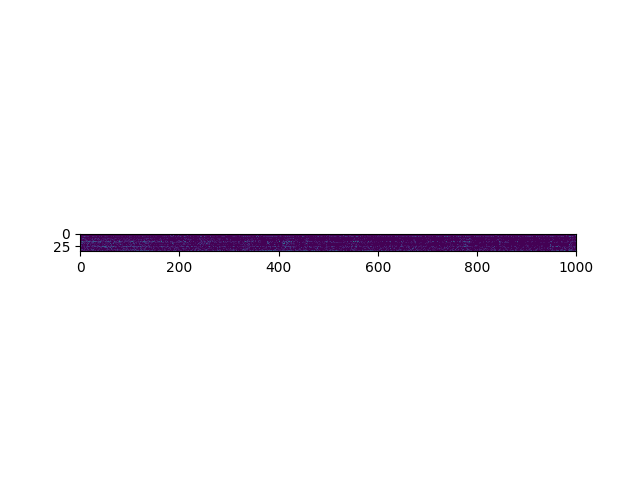

In [9]:
%matplotlib notebook
plt.imshow(counts, interpolation='none')
plt.show()

In [10]:
ds.channels

,local_index,probe_horizontal_position,probe_id,probe_vertical_position,valid_data
id,,,,,
811825599,0,43,744923029,20,False
811825601,1,11,744923029,20,False
811825603,2,59,744923029,40,False
811825605,3,27,744923029,40,False
811825607,4,43,744923029,60,False
811825609,5,11,744923029,60,False
811825611,6,59,744923029,80,False
811825613,7,27,744923029,80,False
811825615,8,43,744923029,100,False


In [11]:
ds.units

,firing_rate,isi_violations,local_index,peak_channel_id,quality,snr
id,,,,,,
812161827,13.134407,0.641241,0,811825603,good,1.357497
812161829,4.502767,1.530837,1,811825601,good,1.201882
812161831,7.288013,1.276635,2,811825603,good,2.244434
812161833,3.427628,1.120715,3,811825605,good,1.030507
812161835,4.333668,1.288467,4,811825607,good,3.725997
812161837,6.264034,0.835678,5,811825609,good,4.545242
812161839,5.862107,0.647278,6,811825609,good,2.608308
812161841,5.973758,1.024724,7,811825611,good,2.273267
812161843,13.337063,0.490777,8,811825613,good,1.007808


In [12]:
ds.probes

,id,name
0,744923018,probeA
1,744923026,probeB
2,744923029,probeC
3,744923033,probeD
4,744923037,probeE
5,744923040,probeF


In [13]:
ds.stimulus_epochs

,start_time,stop_time,stimulus_name,stimulus_block,TF,SF,Ori,Contrast,Pos_x,Pos_y,stimulus_index,Color,Image,Phase
id,,,,,,,,,,,,,,
0,29.919474,89.986237,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,89.986237,90.219749,gabor_20_deg_250ms,0.0,4.0,0.08,0.0,0.8,10.0,-40.0,0.0,NaN,NaN,NaN
2,90.219749,90.469948,gabor_20_deg_250ms,0.0,4.0,0.08,0.0,0.8,-40.0,20.0,0.0,NaN,NaN,NaN
3,90.469948,90.720139,gabor_20_deg_250ms,0.0,4.0,0.08,90.0,0.8,10.0,-10.0,0.0,NaN,NaN,NaN
4,90.720139,90.970337,gabor_20_deg_250ms,0.0,4.0,0.08,45.0,0.8,30.0,-40.0,0.0,NaN,NaN,NaN
5,90.970337,91.220566,gabor_20_deg_250ms,0.0,4.0,0.08,45.0,0.8,-20.0,40.0,0.0,NaN,NaN,NaN
6,91.220566,91.470787,gabor_20_deg_250ms,0.0,4.0,0.08,0.0,0.8,0.0,-10.0,0.0,NaN,NaN,NaN
7,91.470787,91.721016,gabor_20_deg_250ms,0.0,4.0,0.08,0.0,0.8,-10.0,-10.0,0.0,NaN,NaN,NaN
8,91.721016,91.971245,gabor_20_deg_250ms,0.0,4.0,0.08,45.0,0.8,10.0,30.0,0.0,NaN,NaN,NaN
